# Diferenciação automática

In [1]:
import torch

In [2]:
x = torch.tensor(1., requires_grad=True)
print(x.dtype)
y = 4*x**2
print(y)
y.backward()
dydx = x.grad
print(dydx)

torch.float32
tensor(4., grad_fn=<MulBackward0>)
tensor(8.)


In [3]:
def function(x1, x2, x3, x4):
    y = x1*x2 + x3*x2 - x4/x2
    return y

def gradient(y, x1, x2, x3, x4):
    y.backward()
    grad = [x1.grad, x2.grad, x3.grad, x4.grad]

    return grad
x1 = torch.tensor(2., requires_grad=True)
x2 = torch.tensor(3., requires_grad=True)
x3 = torch.tensor(1., requires_grad=True)
x4 = torch.tensor(4., requires_grad=True)
y = function(x1, x2, x3, x4)
grad = gradient(y, x1, x2, x3, x4)
print(grad)

[tensor(3.), tensor(3.4444), tensor(3.), tensor(-0.3333)]


O método .backward() calcula o gradiente da variavel y em relação as variaveis:

1. a variavel foi utilizada para calcular o valor de y
2. a variavel possui o atributo requires_grad
3. a variavel é folha do grafo de computação

variavel Folha significa que a variavel não foi definida com valores de outras variaveis

In [4]:
def y_func(x):
    return 3*x**2

def z_func(y):
    return y**4

x=torch.tensor(2., requires_grad=True)
y = y_func(x)
z = z_func(y)

y.retain_grad()
z.backward()

print(x.grad)
print(y.grad)

tensor(82944.)
tensor(6912.)


In [5]:
x = torch.tensor(2., requires_grad=True)
y = torch.tensor(5., requires_grad=True)
z = x*y

print(z.grad_fn)
print(z.grad_fn._saved_other)
print(z.grad_fn._saved_self)

tensor(5., requires_grad=True)
tensor(2., requires_grad=True)


## Detalhes importantes ao trabalhar com pytorch

O pytorch sempre acumula gradientes

In [6]:
w = torch.tensor(1., requires_grad=True)

data = [4, 7, 2, 8]
for x in data:
    y = w*x
    w.grad = None
    y.backward()
    print(w.grad)

tensor(4.)
tensor(7.)
tensor(2.)
tensor(8.)


Modificando um tensor que requer gradiente

In [7]:
w = torch.tensor(1., requires_grad=True)

lr = 0.01
data = [4, 7, 2, 8]
for x in data:
    y = w*x
    w.grad = None
    y.backward()
    with torch.no_grad():
        w -= w-lr*w.grad
        

Removendo um tensor do grafo de computação

In [8]:
x=torch.rand(100, requires_grad=True)
# Copia os valores do tensor
# y = x.clone()

# remove do grafo de computação
#y = x.detach()

# megazord
y = x.detach().clone()
print(y)
y[0] = 100
print(x)

tensor([0.9216, 0.9586, 0.0444, 0.5710, 0.3190, 0.9832, 0.2693, 0.0063, 0.8251,
        0.7616, 0.9964, 0.4294, 0.2191, 0.8858, 0.0933, 0.1588, 0.8806, 0.3698,
        0.7798, 0.7167, 0.7222, 0.8622, 0.1070, 0.0891, 0.3359, 0.1461, 0.5483,
        0.3922, 0.4470, 0.9114, 0.0221, 0.7027, 0.3302, 0.9802, 0.0655, 0.5231,
        0.3548, 0.7897, 0.4570, 0.5213, 0.9916, 0.4634, 0.1122, 0.2517, 0.8374,
        0.0705, 0.0520, 0.4639, 0.3804, 0.8626, 0.2197, 0.9680, 0.7397, 0.7377,
        0.2140, 0.6716, 0.0233, 0.9555, 0.3955, 0.8288, 0.7578, 0.9896, 0.4161,
        0.7221, 0.0104, 0.0829, 0.5904, 0.1042, 0.8425, 0.1193, 0.2680, 0.5645,
        0.0252, 0.3340, 0.1043, 0.0088, 0.3481, 0.5062, 0.2181, 0.6566, 0.1432,
        0.2881, 0.4178, 0.9562, 0.3633, 0.4541, 0.2848, 0.9980, 0.4398, 0.9543,
        0.1691, 0.6221, 0.8834, 0.1645, 0.6428, 0.2732, 0.4921, 0.4026, 0.1654,
        0.7891])
tensor([0.9216, 0.9586, 0.0444, 0.5710, 0.3190, 0.9832, 0.2693, 0.0063, 0.8251,
        0.7616, 0.9964,

In [9]:
# transformando um tensor em vetor numpy
xnew = x.detach().clone().numpy()

In [10]:
# numpy -> torch

xte = torch.from_numpy(xnew)

# Regressão Linear Usando diferenciação automatica

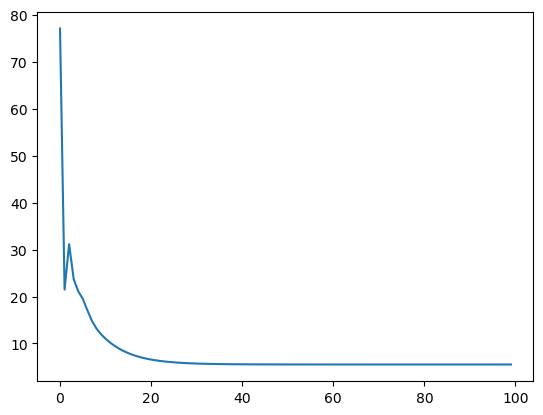

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import torch

class Model:

    def __init__(self, a, b):
        self.a = torch.tensor(a, requires_grad=True)
        self.b = torch.tensor(b, requires_grad=True)

    def __call__(self, x):
        y = self.a*x + self.b
        return y
    
def mse(model, x, y):
    ym = model(x)
    error = torch.mean((y-ym)**2)

    return error


def step(model, x, y, lr):
    error = mse(model, x, y)
    model.a.grad = None
    model.b.grade = None
    error.backward()

    with torch.no_grad():
        model.a -= lr*model.a.grad
        model.b -= lr*model.b.grad

    return error.item()

def train(model, x, y, lr, num_epoch):
    errors = []
    for epoch in range(num_epoch):
        error = step(model, x, y, lr)
        errors.append(error)
    return errors

data = torch.from_numpy(np.loadtxt('../data/age_data_1.txt'))
x, y = data.T


model = Model(a=1., b=0.)
errors = train(model, x, y, 0.3, 100)
plt.plot(errors)